<a href="https://colab.research.google.com/github/rakshithcgowda/Machine-learning-project/blob/main/ML_Olympiad_Offbeats_Edition(Python_pycaret).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install scikit-learn
!pip install --upgrade pycaret scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [3]:
data = pd.read_csv('train.csv')
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
data.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
data['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [6]:
# https://www.kaggle.com/code/ethanabimelech/house-prices-eda-xgboost
# https://www.kaggle.com/code/kartikkumaria/house-price-using-tensorflow-and-pycaret

In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<ipython-input-8-57663f6a2b9e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


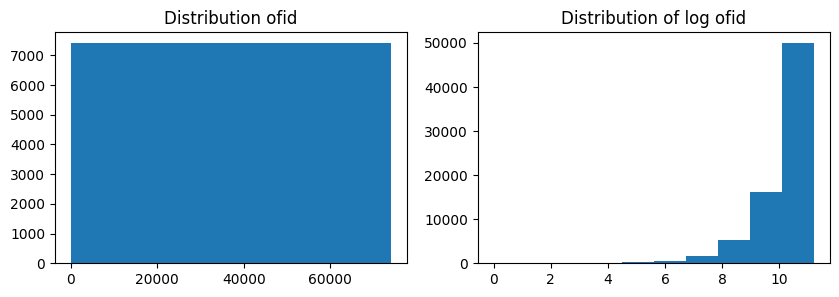

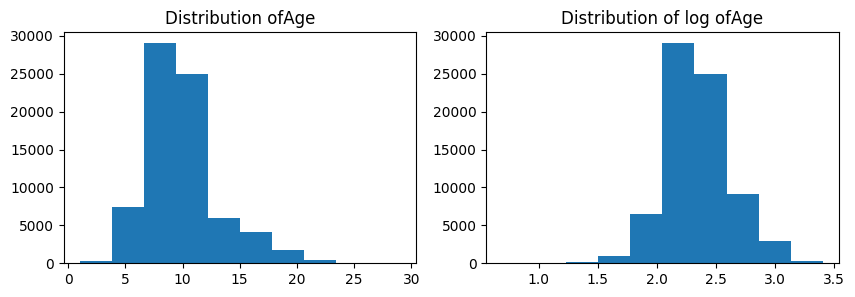

In [8]:
for column in train_df.columns:
  if train_df[column].dtype == 'int64':
    fig , ax = plt.subplots(figsize = (10,3))
    plt.subplot(1,2,1)
    plt.hist(train_df[column]);
    plt.title('Distribution of'+column);
    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(train_df[column]));
    plt.title('Distribution of log of'+column);

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in train_df.columns:
    if train_df[column].dtype == "object":
        train_df[column] = label_encoder.fit_transform(train_df[column])
for column in test_df.columns:
    if test_df[column].dtype == "object":
        test_df[column] = label_encoder.fit_transform(test_df[column])

In [10]:
y = train_df["Age"]
x = train_df.drop("Age",axis=1 )

In [11]:
x_arr = x.values
y_arr = y.values

In [12]:
x_arr.shape

(74051, 9)

In [13]:
y_arr.shape

(74051,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size=0.3,random_state=42)

In [15]:
print("x train size: ",x_train.shape)
print("y train size: ",y_train.shape)
print("x test size: ",x_test.shape)
print("y test size: ",y_test.shape)

x train size:  (51835, 9)
y train size:  (51835,)
x test size:  (22216, 9)
y test size:  (22216,)


In [16]:
import tensorflow.keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def get_model():
    model = Sequential([
        Dense(128, input_shape=(9,), activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(
        loss="mse",
        optimizer="adam",
        metrics=[rmse]  # Use the custom RMSE metric here
    )
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [17]:
es_cb = EarlyStopping(monitor="val_loss", patience=10)

model = get_model()

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    verbose=0
)

In [18]:
final_loss, final_rmse = model.evaluate(x_test, y_test)
print(f"Final Loss: {final_loss}, Final RMSE: {final_rmse}")

695/695 [==============================] - 1s 2ms/step - loss: 10.1508 - rmse: 3.1342
Final Loss: 10.15083122253418, Final RMSE: 3.134201765060425


In [19]:
x_test_arr = test_df.values

In [20]:
predicted_values = model.predict(x_test_arr)

1543/1543 [==============================] - 4s 3ms/step


In [21]:
predicted_values_antilog = np.exp(predicted_values)

In [22]:
# Assuming 'test_df' and 'predicted_values' are defined correctly

# Check if predicted_values needs flattening
if predicted_values.ndim > 1:
    predicted_values = predicted_values.flatten()  # Or handle differently as needed

# Create DataFrame with flattened predicted_values
submi = pd.DataFrame({'id': test_df['id'], 'Age': predicted_values})

submi.to_csv('submission.csv', index=False)

In [23]:
x = pd.read_csv('submission.csv')
x.head()

,id,Age
0,74051,9.922451
1,74052,9.922451
2,74053,9.922451
3,74054,9.922451
4,74055,9.922451


In [24]:
# optimizing the Regression using pyCarest
!pip install pycaret

In [25]:
# !pip install scikit-learn
# import pycaret
from pycaret.regression import *

In [26]:
setup(data = train_df, target='Age',
      train_size = 0.7, data_split_shuffle = False,verbose=False,

      remove_outliers = True, outliers_method = "iforest", outliers_threshold = 0.05,
      )
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.4051,4.1762,2.0435,0.5849,0.1624,0.1374,2.0450
et,Extra Trees Regressor,1.4729,4.4432,2.1077,0.5583,0.1685,0.1451,13.4140
xgboost,Extreme Gradient Boosting,1.4677,4.5767,2.1380,0.5449,0.1697,0.1440,1.2360
gbr,Gradient Boosting Regressor,1.4577,4.5917,2.1414,0.5433,0.1679,0.1429,7.4140
lr,Linear Regression,1.5097,4.6351,2.1529,0.5393,0.1726,0.1487,2.6890
ridge,Ridge Regression,1.5098,4.6354,2.1529,0.5393,0.1726,0.1487,0.8300
br,Bayesian Ridge,1.5098,4.6354,2.1529,0.5393,0.1726,0.1487,0.8540
lar,Least Angle Regression,1.5115,4.6432,2.1547,0.5385,0.1727,0.1490,0.8400
rf,Random Forest Regressor,1.5090,4.6581,2.1574,0.5369,0.1725,0.1496,28.9530
en,Elastic Net,1.6654,5.3918,2.3219,0.4642,0.1913,0.1699,0.7510


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [27]:
lbg = create_model('lightgbm',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3995,4.1942,2.0480,0.5813,0.1618,0.1374
1,1.4107,4.2048,2.0506,0.5800,0.1639,0.1374
2,1.3965,4.1120,2.0278,0.5871,0.1622,0.1380
3,1.4149,4.2005,2.0495,0.5882,0.1624,0.1385
4,1.4161,4.2545,2.0626,0.5967,0.1645,0.1383
5,1.4136,4.2072,2.0511,0.5623,0.1636,0.1391
6,1.4221,4.2476,2.0610,0.5888,0.1631,0.1385
7,1.3813,4.0631,2.0157,0.5949,0.1601,0.1340
8,1.3814,4.0438,2.0109,0.5929,0.1599,0.1354


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
ET = create_model('et',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4841,4.5362,2.1298,0.5472,0.1700,0.1478
1,1.4840,4.4647,2.1130,0.5541,0.1707,0.1463
2,1.4722,4.4336,2.1056,0.5548,0.1687,0.1459
3,1.4634,4.4378,2.1066,0.5650,0.1676,0.1433
4,1.4829,4.5430,2.1314,0.5693,0.1707,0.1457
5,1.4776,4.5032,2.1221,0.5315,0.1696,0.1454
6,1.4877,4.5195,2.1259,0.5625,0.1690,0.1460
7,1.4453,4.2113,2.0521,0.5801,0.1651,0.1418
8,1.4399,4.2805,2.0689,0.5691,0.1650,0.1417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
xboost = create_model('xgboost',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5416,5.0890,2.2559,0.4920,0.1823,0.1564
1,1.5123,4.8428,2.2006,0.5163,0.1731,0.1487
2,1.4178,4.3335,2.0817,0.5649,0.1645,0.1382
3,1.4508,4.4037,2.0985,0.5683,0.1674,0.1431
4,1.4545,4.4696,2.1141,0.5763,0.1692,0.1436
5,1.4636,4.4920,2.1194,0.5327,0.1700,0.1451
6,1.4384,4.3995,2.0975,0.5741,0.1656,0.1395
7,1.4170,4.2792,2.0686,0.5733,0.1640,0.1368
8,1.4132,4.2454,2.0604,0.5726,0.1629,0.1376


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
rd= create_model('ridge',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4902,4.5869,2.1417,0.5421,0.1710,0.1474
1,1.5203,4.6162,2.1485,0.5389,0.1729,0.1490
2,1.4967,4.6006,2.1449,0.5381,0.1719,0.1486
3,1.5113,4.6687,2.1607,0.5423,0.1726,0.1490
4,1.5334,4.8155,2.1944,0.5435,0.1767,0.1511
5,1.5217,4.6511,2.1566,0.5161,0.1726,0.1500
6,1.5128,4.6755,2.1623,0.5474,0.1732,0.1488
7,1.4963,4.5507,2.1332,0.5463,0.1714,0.1467
8,1.5027,4.5427,2.1314,0.5427,0.1725,0.1483


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
stacked = stack_models(estimator_list = [lbg,ET,xboost],meta_model = lbg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4108,4.2534,2.0624,0.5754,0.1634,0.1389
1,1.4298,4.2484,2.0612,0.5757,0.1651,0.1399
2,1.4038,4.1652,2.0409,0.5818,0.1630,0.1387
3,1.4282,4.2767,2.0680,0.5808,0.1638,0.1397
4,1.4152,4.2674,2.0658,0.5955,0.1647,0.1381
5,1.4143,4.2332,2.0575,0.5596,0.1642,0.1391
6,1.4262,4.3159,2.0775,0.5822,0.1638,0.1385
7,1.3856,4.1011,2.0251,0.5911,0.1607,0.1342
8,1.3769,4.0432,2.0108,0.5930,0.1596,0.1347


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [32]:
ensemble = ensemble_model(lbg,method="Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5575,4.6574,2.1581,0.5351,0.1746,0.1592
1,1.6003,4.6579,2.1582,0.5348,0.1768,0.1632
2,1.5921,4.5947,2.1435,0.5387,0.1766,0.1652
3,1.5971,4.6407,2.1542,0.5451,0.1756,0.1639
4,1.5914,4.6187,2.1491,0.5622,0.1765,0.1633
5,1.6035,4.6442,2.1550,0.5168,0.1768,0.1653
6,1.5871,4.6437,2.1549,0.5504,0.1758,0.1626
7,1.5673,4.4679,2.1137,0.5545,0.1730,0.1603
8,1.5758,4.5268,2.1276,0.5443,0.1739,0.1622


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [33]:
blended = blend_models(estimator_list = [lbg,ET,xboost],fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4381,4.3581,2.0876,0.5650,0.1668,0.1437
1,1.4447,4.2975,2.0730,0.5708,0.1662,0.1418
2,1.4061,4.1694,2.0419,0.5814,0.1625,0.1384
3,1.4231,4.2193,2.0541,0.5864,0.1630,0.1396
4,1.4288,4.2859,2.0703,0.5937,0.1655,0.1403
5,1.4310,4.2696,2.0663,0.5558,0.1650,0.1412
6,1.4293,4.2643,2.0650,0.5872,0.1635,0.1394
7,1.3943,4.0614,2.0153,0.5950,0.1604,0.1355
8,1.3879,4.0437,2.0109,0.5929,0.1597,0.1360


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
newPredictions = predict_model(lbg, data = test_df)

In [35]:
predictions = np.exp(newPredictions)

In [36]:
predictions

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,prediction_label
0,inf,2.718750,2.857651,2.143629,1.316531,5.531686e+03,3.874825e+01,5.636817,15.203898,1881.768237
1,inf,2.718750,3.197918,2.429049,1.316531,5.428516e+06,1.130795e+03,25.687840,52.927864,2318.422225
2,inf,1.000000,3.623716,2.684515,1.384031,2.130022e+06,2.589155e+02,48.612537,123.892609,40709.635700
3,inf,1.000000,4.711470,2.684515,1.473293,2.110297e+12,6.475584e+05,698.359924,1130.794678,14678.239439
4,inf,2.718750,3.041954,2.339647,1.300177,1.286746e+05,2.516785e+02,11.780039,27.968143,1911.315914
...,...,...,...,...,...,...,...,...,...,...
49363,inf,1.000000,3.669297,2.822153,1.384031,1.217796e+07,8.047101e+02,176.581726,42.790184,11693.262945
49364,inf,2.718750,2.822153,2.143629,1.300177,2.904766e+04,8.449535e+01,7.379012,34.594254,2951.290534
49365,inf,1.000000,4.426016,3.197918,1.436917,4.260090e+13,8.900952e+04,940.492859,6557.372559,324278.709743
49366,inf,1.000000,3.446985,2.585710,1.333091,6.344496e+06,4.436972e+02,41.594131,142.759659,21351.213011


In [38]:
# Assuming predictions is a NumPy array with 49368 elements
# predictions = predictions[:49368]

# Create DataFrame with flattened predicted_values
if predicted_values.ndim > 1:
    predicted_values = predicted_values.flatten()  # Or handle differently as needed

# Create DataFrame with flattened predicted_values
submi = pd.DataFrame({'id': test_df['id'], 'Age': predicted_values})

submi.to_csv('subm.csv', index=False)


In [39]:
submi.to_csv("submi.csv",index=False)

In [40]:
x = pd.read_csv('submi.csv')
x.head()

,id,Age
0,74051,9.922451
1,74052,9.922451
2,74053,9.922451
3,74054,9.922451
4,74055,9.922451
